In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('after_fe.csv')

In [4]:
df

,daysOnMarket,availableFrom,price,zip,beds,baths,latitude,longitude,hasVideo,PhotosNum,...,month_available,day_available,beds_baths_interaction,log_monthly_housing_costs,precinct_safety_rank_scaled,median_income_scaled,crime_to_safety_ratio,beds_to_baths_ratio,diversity_index,occupied_to_vacant_ratio
0,1.0,2024-11-25,1855.0,11212,1,1.0,40.662186,-73.922293,1,4,...,11,25,1.0,7.087574,1.393251,-1.454809,0.029137,0.500000,0.000074,13.157442
1,4.0,2024-11-22,2235.0,11212,2,1.0,40.663817,-73.924122,1,5,...,11,22,2.0,7.087574,1.393251,-1.454809,0.029137,1.000000,0.000074,13.157442
2,4.0,2024-11-22,1750.0,11212,1,1.0,40.668506,-73.917055,1,7,...,11,22,1.0,7.087574,1.539399,-1.454809,0.029947,0.500000,0.000074,13.157442
3,6.0,2024-11-20,1850.0,11212,1,1.0,40.657349,-73.917750,1,4,...,11,20,1.0,7.087574,1.393251,-1.454809,0.029137,0.500000,0.000074,13.157442
4,7.0,2024-11-19,3000.0,11212,3,1.0,40.659825,-73.922602,1,9,...,11,19,3.0,7.087574,1.393251,-1.454809,0.029137,1.500000,0.000074,13.157442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,121.0,2024-11-15,4070.0,10459,4,1.0,40.823948,-73.889854,0,0,...,11,15,4.0,7.188413,0.272790,-1.325090,0.032050,2.000000,0.000073,25.148305
6967,6.0,2024-11-15,3800.0,10307,3,3.0,40.513058,-74.249470,0,18,...,11,15,9.0,7.658228,-1.627123,0.668903,0.205292,0.750000,0.000001,20.458824
6968,5.0,2024-11-15,3750.0,10038,2,1.0,40.709580,-74.009330,0,5,...,11,15,2.0,7.921536,0.029211,0.069353,0.034026,1.000000,0.001610,5.254689
6969,10.0,2024-11-15,3200.0,10038,1,1.0,40.709370,-74.006035,0,0,...,11,15,1.0,7.921536,0.029211,0.069353,0.034026,0.500000,0.001610,5.254689


In [5]:
df.columns

Index(['daysOnMarket', 'availableFrom', 'price', 'zip', 'beds', 'baths',
       'latitude', 'longitude', 'hasVideo', 'PhotosNum',
       'Number of Households', 'Median Household Income', 'Per Capita Income',
       'Total Income Distribution', 'Median Gross Rent', 'Median Home Value',
       'Occupied Housing Units', 'Vacant Housing Units',
       'Owner-Occupied Units (value < $100,000)', 'Monthly Housing Costs',
       'Precinct', 'schools_in_precinct', 'nearby_subway_stations',
       'crime_rate', 'precinct_safety_rank', 'Median Age_ratio',
       'Male Population_ratio', 'Female Population_ratio', 'White Alone_ratio',
       'Black or African American Alone_ratio', 'Asian Alone_ratio',
       'Hispanic or Latino_ratio', 'Population Below Poverty Level_ratio',
       'Employed_ratio', 'Unemployed_ratio',
       'High School Graduate (Age 25+)_ratio',
       'Bachelor’s Degree (Age 25+)_ratio',
       'Graduate or Professional Degree (Age 25+)_ratio',
       'Never Married_ratio', 

In [6]:
housing_data = df

In [7]:
housing_data = housing_data.drop('availableFrom', axis=1)

In [8]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = housing_data.drop(columns=['price'], errors='ignore')  # Remove price columns if log-transformed
y = housing_data['log_price'] if 'log_price' in housing_data.columns else housing_data['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and testing data prepared.")


Training and testing data prepared.


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predict on the test set
y_pred = baseline_model.predict(X_test)

# Evaluate the model
baseline_mae = mean_absolute_error(y_test, y_pred)
baseline_rmse = mean_squared_error(y_test, y_pred, squared=False)
baseline_r2 = r2_score(y_test, y_pred)

print("Baseline Model Performance:")
print(f"MAE: {baseline_mae}")
print(f"RMSE: {baseline_rmse}")
print(f"R^2: {baseline_r2}")

Baseline Model Performance:
MAE: 1774.916228558033
RMSE: 3804.7471705716925
R^2: 0.6151344040397689


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Model Performance:")
print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print(f"R^2: {rf_r2}")

Random Forest Model Performance:
MAE: 923.0862365591398
RMSE: 2658.719169314832
R^2: 0.8120672718039043


In [11]:
from xgboost import XGBRegressor
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
X_train.columns = X_train.columns.str.replace('[\[\]<]', '', regex=True)
X_test.columns = X_test.columns.str.replace('[\[\]<]', '', regex=True)

# Train XGBoost
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
xgb_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
xgb_r2 = r2_score(y_test, xgb_pred)

print("XGBoost Model Performance:")
print(f"MAE: {xgb_mae}")
print(f"RMSE: {xgb_rmse}")
print(f"R^2: {xgb_r2}")

XGBoost Model Performance:
MAE: 963.299081016185
RMSE: 3001.49963565494
R^2: 0.760484251212995


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Hyperparameter grid for Random Forest
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
# }

# grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)


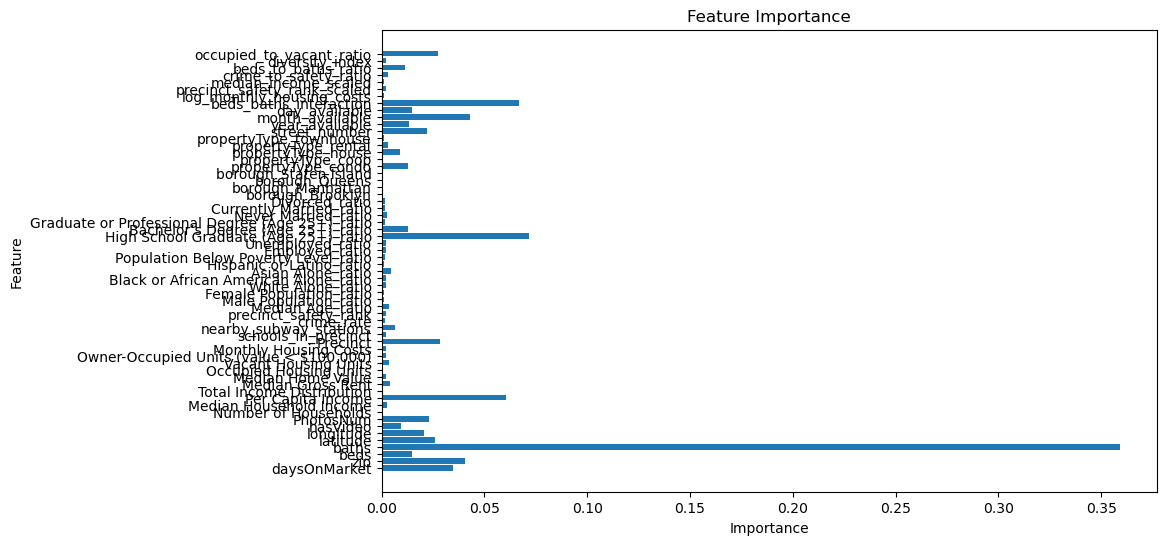

In [12]:
import matplotlib.pyplot as plt

# Feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [13]:
# Create a DataFrame to sort the feature importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort the features by importance in descending order
sorted_features = feature_importance_df.sort_values(by='importance', ascending=False)

# Get the top 15 features
top_15_features = sorted_features.head(20)

# Print top 15 features
print("Top 15 Features based on Importance:")
print(top_15_features)

Top 15 Features based on Importance:
                                 feature  importance
3                                  baths    0.358958
33  High School Graduate (Age 25+)_ratio    0.071714
52                beds_baths_interaction    0.066741
10                     Per Capita Income    0.060622
50                       month_available    0.043112
1                                    zip    0.040583
0                           daysOnMarket    0.034844
18                              Precinct    0.028482
59              occupied_to_vacant_ratio    0.027598
4                               latitude    0.026234
7                              PhotosNum    0.023135
48                         street_number    0.022245
5                              longitude    0.020483
2                                   beds    0.014969
51                         day_available    0.014875
49                        year_available    0.013147
43                    propertyType_condo    0.013025
34     Ba

In [14]:
rental_data = housing_data.copy()
rental_data

,daysOnMarket,price,zip,beds,baths,latitude,longitude,hasVideo,PhotosNum,Number of Households,...,month_available,day_available,beds_baths_interaction,log_monthly_housing_costs,precinct_safety_rank_scaled,median_income_scaled,crime_to_safety_ratio,beds_to_baths_ratio,diversity_index,occupied_to_vacant_ratio
0,1.0,1855.0,11212,1,1.0,40.662186,-73.922293,1,4,32091.0,...,11,25,1.0,7.087574,1.393251,-1.454809,0.029137,0.500000,0.000074,13.157442
1,4.0,2235.0,11212,2,1.0,40.663817,-73.924122,1,5,32091.0,...,11,22,2.0,7.087574,1.393251,-1.454809,0.029137,1.000000,0.000074,13.157442
2,4.0,1750.0,11212,1,1.0,40.668506,-73.917055,1,7,32091.0,...,11,22,1.0,7.087574,1.539399,-1.454809,0.029947,0.500000,0.000074,13.157442
3,6.0,1850.0,11212,1,1.0,40.657349,-73.917750,1,4,32091.0,...,11,20,1.0,7.087574,1.393251,-1.454809,0.029137,0.500000,0.000074,13.157442
4,7.0,3000.0,11212,3,1.0,40.659825,-73.922602,1,9,32091.0,...,11,19,3.0,7.087574,1.393251,-1.454809,0.029137,1.500000,0.000074,13.157442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,121.0,4070.0,10459,4,1.0,40.823948,-73.889854,0,0,17805.0,...,11,15,4.0,7.188413,0.272790,-1.325090,0.032050,2.000000,0.000073,25.148305
6967,6.0,3800.0,10307,3,3.0,40.513058,-74.249470,0,18,5217.0,...,11,15,9.0,7.658228,-1.627123,0.668903,0.205292,0.750000,0.000001,20.458824
6968,5.0,3750.0,10038,2,1.0,40.709580,-74.009330,0,5,10646.0,...,11,15,2.0,7.921536,0.029211,0.069353,0.034026,1.000000,0.001610,5.254689
6969,10.0,3200.0,10038,1,1.0,40.709370,-74.006035,0,0,10646.0,...,11,15,1.0,7.921536,0.029211,0.069353,0.034026,0.500000,0.001610,5.254689


In [15]:
# Define bins and labels
# Define new bins and labels
bins = [0, 3000, 6000, float('inf')]  # Low, Medium, High
labels = [0, 1, 2]  # Numerical labels for the new bins

# Create a new column for price bins with extended range
rental_data['price_bin'] = pd.cut(rental_data['price'], bins=bins, labels=labels)

# Label encode the price bins
# label_encoder = LabelEncoder()
# rental_data['price_bin'] = label_encoder.fit_transform(rental_data['price_bin'])

In [16]:
rental_data

,daysOnMarket,price,zip,beds,baths,latitude,longitude,hasVideo,PhotosNum,Number of Households,...,day_available,beds_baths_interaction,log_monthly_housing_costs,precinct_safety_rank_scaled,median_income_scaled,crime_to_safety_ratio,beds_to_baths_ratio,diversity_index,occupied_to_vacant_ratio,price_bin
0,1.0,1855.0,11212,1,1.0,40.662186,-73.922293,1,4,32091.0,...,25,1.0,7.087574,1.393251,-1.454809,0.029137,0.500000,0.000074,13.157442,0
1,4.0,2235.0,11212,2,1.0,40.663817,-73.924122,1,5,32091.0,...,22,2.0,7.087574,1.393251,-1.454809,0.029137,1.000000,0.000074,13.157442,0
2,4.0,1750.0,11212,1,1.0,40.668506,-73.917055,1,7,32091.0,...,22,1.0,7.087574,1.539399,-1.454809,0.029947,0.500000,0.000074,13.157442,0
3,6.0,1850.0,11212,1,1.0,40.657349,-73.917750,1,4,32091.0,...,20,1.0,7.087574,1.393251,-1.454809,0.029137,0.500000,0.000074,13.157442,0
4,7.0,3000.0,11212,3,1.0,40.659825,-73.922602,1,9,32091.0,...,19,3.0,7.087574,1.393251,-1.454809,0.029137,1.500000,0.000074,13.157442,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,121.0,4070.0,10459,4,1.0,40.823948,-73.889854,0,0,17805.0,...,15,4.0,7.188413,0.272790,-1.325090,0.032050,2.000000,0.000073,25.148305,1
6967,6.0,3800.0,10307,3,3.0,40.513058,-74.249470,0,18,5217.0,...,15,9.0,7.658228,-1.627123,0.668903,0.205292,0.750000,0.000001,20.458824,1
6968,5.0,3750.0,10038,2,1.0,40.709580,-74.009330,0,5,10646.0,...,15,2.0,7.921536,0.029211,0.069353,0.034026,1.000000,0.001610,5.254689,1
6969,10.0,3200.0,10038,1,1.0,40.709370,-74.006035,0,0,10646.0,...,15,1.0,7.921536,0.029211,0.069353,0.034026,0.500000,0.001610,5.254689,1


In [17]:
rental_data['price_bin'].value_counts().sum()

6971

In [82]:
# Rename a single column
# rental_data.rename(columns={'price_bin_encoded': 'price_bin'}, inplace=True)
# rental_data.head(1)

In [18]:
rental_data['price_bin'].value_counts()

price_bin
1    3154
0    2923
2     894
Name: count, dtype: int64

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data for classification
X_class = rental_data.drop(['price', 'price_bin'], axis=1)  # Drop target columns
y_class = rental_data['price_bin']  # Target is the price bin
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_class, y_train_class)

# Evaluate the classifier
y_pred_class = clf.predict(X_test_class)
print(classification_report(y_test_class, y_pred_class))


              precision    recall  f1-score   support

           0       0.78      0.79      0.79       571
           1       0.78      0.79      0.78       644
           2       0.92      0.82      0.87       180

    accuracy                           0.80      1395
   macro avg       0.83      0.80      0.81      1395
weighted avg       0.80      0.80      0.80      1395



In [131]:
rental_data.to_csv('data_to_model.csv', index=False)

In [2]:
rental_data = pd.read_csv('data_to_model.csv')

In [5]:
X_class

,daysOnMarket,zip,beds,baths,latitude,longitude,hasVideo,PhotosNum,Number of Households,Median Household Income,...,month_available,day_available,beds_baths_interaction,log_monthly_housing_costs,precinct_safety_rank_scaled,median_income_scaled,crime_to_safety_ratio,beds_to_baths_ratio,diversity_index,occupied_to_vacant_ratio
0,1.0,11212,1,1.0,40.662186,-73.922293,1,4,32091.0,35840.0,...,11,25,1.0,7.087574,1.393251,-1.454809,0.029137,0.500000,0.000074,13.157442
1,4.0,11212,2,1.0,40.663817,-73.924122,1,5,32091.0,35840.0,...,11,22,2.0,7.087574,1.393251,-1.454809,0.029137,1.000000,0.000074,13.157442
2,4.0,11212,1,1.0,40.668506,-73.917055,1,7,32091.0,35840.0,...,11,22,1.0,7.087574,1.539399,-1.454809,0.029947,0.500000,0.000074,13.157442
3,6.0,11212,1,1.0,40.657349,-73.917750,1,4,32091.0,35840.0,...,11,20,1.0,7.087574,1.393251,-1.454809,0.029137,0.500000,0.000074,13.157442
4,7.0,11212,3,1.0,40.659825,-73.922602,1,9,32091.0,35840.0,...,11,19,3.0,7.087574,1.393251,-1.454809,0.029137,1.500000,0.000074,13.157442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,121.0,10459,4,1.0,40.823948,-73.889854,0,0,17805.0,41270.0,...,11,15,4.0,7.188413,0.272790,-1.325090,0.032050,2.000000,0.000073,25.148305
6967,6.0,10307,3,3.0,40.513058,-74.249470,0,18,5217.0,124738.0,...,11,15,9.0,7.658228,-1.627123,0.668903,0.205292,0.750000,0.000001,20.458824
6968,5.0,10038,2,1.0,40.709580,-74.009330,0,5,10646.0,99641.0,...,11,15,2.0,7.921536,0.029211,0.069353,0.034026,1.000000,0.001610,5.254689
6969,10.0,10038,1,1.0,40.709370,-74.006035,0,0,10646.0,99641.0,...,11,15,1.0,7.921536,0.029211,0.069353,0.034026,0.500000,0.001610,5.254689


In [6]:
y_class

0       0
1       0
2       0
3       0
4       0
       ..
6966    1
6967    1
6968    1
6969    1
6970    2
Name: price_bin, Length: 6971, dtype: int64

# Feature Selection

In [4]:
# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train_class.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importances.head(20))  # Top 20 features

                                 Feature  Importance
52                beds_baths_interaction    0.099506
2                                   beds    0.062924
3                                  baths    0.059581
5                              longitude    0.057836
4                               latitude    0.054975
57                   beds_to_baths_ratio    0.054582
48                         street_number    0.054555
50                       month_available    0.051324
0                           daysOnMarket    0.049424
7                              PhotosNum    0.033174
33  High School Graduate (Age 25+)_ratio    0.026811
20                nearby_subway_stations    0.022792
17                 Monthly Housing Costs    0.022025
18                              Precinct    0.021950
10                     Per Capita Income    0.019274
51                         day_available    0.017802
53             log_monthly_housing_costs    0.017455
1                                    zip    0.

In [7]:
# Select the top k features based on importance
k = 30  # Number of top features to select
selected_features = feature_importances.head(k)['Feature'].tolist()

# Create a new dataset with the top k selected features
X_train_selected = X_train_class[selected_features]
X_test_selected = X_test_class[selected_features]

In [8]:
# Retrain Random Forest on selected features
clf_selected = RandomForestClassifier(random_state=42)
clf_selected.fit(X_train_selected, y_train_class)

# Evaluate the classifier
y_pred_selected = clf_selected.predict(X_test_selected)
print(classification_report(y_test_class, y_pred_selected))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       571
           1       0.78      0.80      0.79       644
           2       0.93      0.83      0.87       180

    accuracy                           0.80      1395
   macro avg       0.83      0.81      0.82      1395
weighted avg       0.80      0.80      0.80      1395



In [24]:
from sklearn.feature_selection import RFE

# Initialize Recursive Feature Elimination with Random Forest
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
rfe.fit(X_train_class, y_train_class)

# Get selected features
selected_features_rfe = X_train_class.columns[rfe.support_]

# Create datasets with selected features
X_train_rfe = X_train_class[selected_features_rfe]
X_test_rfe = X_test_class[selected_features_rfe]

# Retrain with selected features
clf_rfe = RandomForestClassifier(random_state=42)
clf_rfe.fit(X_train_rfe, y_train_class)
y_pred_rfe = clf_rfe.predict(X_test_rfe)
print(classification_report(y_test_class, y_pred_rfe))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       571
           1       0.76      0.78      0.77       644
           2       0.89      0.78      0.83       180

    accuracy                           0.78      1395
   macro avg       0.81      0.78      0.80      1395
weighted avg       0.79      0.78      0.78      1395



In [25]:
selected_features_rfe

Index(['daysOnMarket', 'beds', 'latitude', 'longitude', 'Per Capita Income',
       'Precinct', 'High School Graduate (Age 25+)_ratio', 'street_number',
       'month_available', 'beds_baths_interaction'],
      dtype='object')

In [26]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Train Random Forest to get feature importances
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_class, y_train_class)

# Get feature importances and sort them in descending order
feature_importances = pd.DataFrame({
    'Feature': X_train_class.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Get the sorted feature list
sorted_features = feature_importances['Feature'].tolist()

# Initialize variables for tracking progress
selected_features = []
best_accuracy = 0
consecutive_drops = 0
max_drops = 60  # Stop after 5 consecutive drops in accuracy
results = []

# Iteratively add features in order of importance
for feature in tqdm(sorted_features, desc="Adding features", unit="feature"):
    # Add the next most important feature
    selected_features.append(feature)
    
    # Train model on the selected features
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_class[selected_features], y_train_class)
    
    # Evaluate model
    y_pred = clf.predict(X_test_class[selected_features])
    accuracy = accuracy_score(y_test_class, y_pred)
    results.append((len(selected_features), accuracy))
    
    # Check if accuracy improves
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        consecutive_drops = 0  # Reset drop counter
    else:
        consecutive_drops += 1
    
    # Stop if accuracy drops for max_drops steps
    if consecutive_drops >= max_drops:
        print(f"Stopping as accuracy failed to improve for {max_drops} consecutive steps.")
        break

# Display results
results_df = pd.DataFrame(results, columns=['Number of Features', 'Accuracy'])
print(results_df)

# Final selected features
print(f"Selected Features: {selected_features}")


Adding features: 100%|█████████████████████| 60/60 [00:36<00:00,  1.66feature/s]

    Number of Features  Accuracy
0                    1  0.594982
1                    2  0.599283
2                    3  0.598566
3                    4  0.660932
4                    5  0.764158
5                    6  0.771326
6                    7  0.774910
7                    8  0.785663
8                    9  0.786380
9                   10  0.800000
10                  11  0.794982
11                  12  0.794982
12                  13  0.797849
13                  14  0.797849
14                  15  0.798566
15                  16  0.792115
16                  17  0.795699
17                  18  0.795699
18                  19  0.793548
19                  20  0.792115
20                  21  0.788530
21                  22  0.790681
22                  23  0.791398
23                  24  0.792115
24                  25  0.795699
25                  26  0.793548
26                  27  0.790681
27                  28  0.797133
28                  29  0.795699
29        

In [27]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Train Random Forest to get feature importances
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_class, y_train_class)

# Get feature importances and sort them in descending order
feature_importances = pd.DataFrame({
    'Feature': X_train_class.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Get the sorted feature list
sorted_features = feature_importances['Feature'].tolist()

# Add the top 10 features first
selected_features = sorted_features[:10]
best_accuracy = 0

# Train model with the initial top 10 features
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_class[selected_features], y_train_class)

# Evaluate model
y_pred = clf.predict(X_test_class[selected_features])
best_accuracy = accuracy_score(y_test_class, y_pred)

# Log results
results = [(len(selected_features), best_accuracy)]

# Add remaining features if they improve accuracy
for feature in tqdm(sorted_features[10:], desc="Adding remaining features", unit="feature"):
    # Add the next feature to the list
    selected_features.append(feature)
    
    # Train model with the updated feature set
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_class[selected_features], y_train_class)
    
    # Evaluate model
    y_pred = clf.predict(X_test_class[selected_features])
    accuracy = accuracy_score(y_test_class, y_pred)
    
    # Check if accuracy improves
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        results.append((len(selected_features), accuracy))
    else:
        # Remove the feature if it doesn't improve accuracy
        selected_features.remove(feature)

# Display results
results_df = pd.DataFrame(results, columns=['Number of Features', 'Accuracy'])
print(results_df)

# Final selected features
print(f"Selected Features: {selected_features}")


Adding remaining features: 100%|███████████| 50/50 [00:25<00:00,  1.96feature/s]

   Number of Features  Accuracy
0                  10  0.800000
1                  11  0.804301
2                  12  0.807168
3                  13  0.808602
Selected Features: ['beds_baths_interaction', 'beds', 'baths', 'longitude', 'latitude', 'beds_to_baths_ratio', 'street_number', 'month_available', 'daysOnMarket', 'PhotosNum', 'Monthly Housing Costs', 'Vacant Housing Units', 'borough_Staten Island']


In [17]:
selected_features = ['beds_baths_interaction', 'beds', 'baths', 'longitude', 'latitude', 'beds_to_baths_ratio', 'street_number', 'month_available', 'daysOnMarket', 'PhotosNum', 'Monthly Housing Costs', 'Vacant Housing Units', 'borough_Staten Island']
len(selected_features)

13

In [20]:
X_train_selected = X_train_class[selected_features]
X_test_selected = X_test_class[selected_features]

Selected Features: ['beds_baths_interaction', 'beds', 'baths', 'longitude', 'latitude', 'beds_to_baths_ratio', 'street_number', 'month_available', 'daysOnMarket', 'PhotosNum', 'Monthly Housing Costs', 'Vacant Housing Units', 'borough_Staten Island']

In [21]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define hyperparameter grid with ranges
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(100, 500, num=5)],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train_selected, y_train_class)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_selected)
print(classification_report(y_test_class, y_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best Cross-Validation Accuracy: 0.810616627996772
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       571
           1       0.78      0.82      0.80       644
           2       0.91      0.82      0.87       180

    accuracy                           0.81      1395
   macro avg       0.84      0.81      0.82      1395
weighted avg       0.81      0.81      0.81      1395

[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.1s
[CV] END max_dep

[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   5.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, max_fe

[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   5.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   1.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_feature

[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_fea

In [ ]:
# X_train_selected

In [29]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define hyperparameter grid with ranges
param_dist = {
    'n_estimators': [225,250,275],
    'max_depth': [14, 15, 16],
    'min_samples_split': [4, 5, 6],
    'min_samples_leaf': [4,5,6],
    'max_features': [None]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train_selected, y_train_class)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_selected)
print(classification_report(y_test_class, y_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 15}
Best Cross-Validation Accuracy: 0.815997408238859
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       571
           1       0.79      0.82      0.80       644
           2       0.93      0.85      0.89       180

    accuracy                           0.81      1395
   macro avg       0.84      0.82      0.83      1395
weighted avg       0.81      0.81      0.81      1395



In [30]:
random_search.best_params_

{'n_estimators': 250,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': None,
 'max_depth': 15}

In [31]:
# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_selected)
print(classification_report(y_test_class, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       571
           1       0.79      0.82      0.80       644
           2       0.93      0.85      0.89       180

    accuracy                           0.81      1395
   macro avg       0.84      0.82      0.83      1395
weighted avg       0.81      0.81      0.81      1395



In [32]:
import pickle

# Save the best model to a file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model saved as 'best_model.pkl'")


Model saved as 'best_model.pkl'


In [34]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for all classes
y_pred_proba = best_model.predict_proba(X_test_selected)

# Calculate AUC for multiclass using "ovr" (one-vs-rest)
auc_score = roc_auc_score(y_test_class, y_pred_proba, multi_class="ovr")
print(f"Multiclass AUC Score (OVR): {auc_score:.4f}")

# Note: ROC curves are typically used for binary classification. For multiclass problems,
# you may need separate ROC curves for each class or use alternative visualizations.


Multiclass AUC Score (OVR): 0.9264


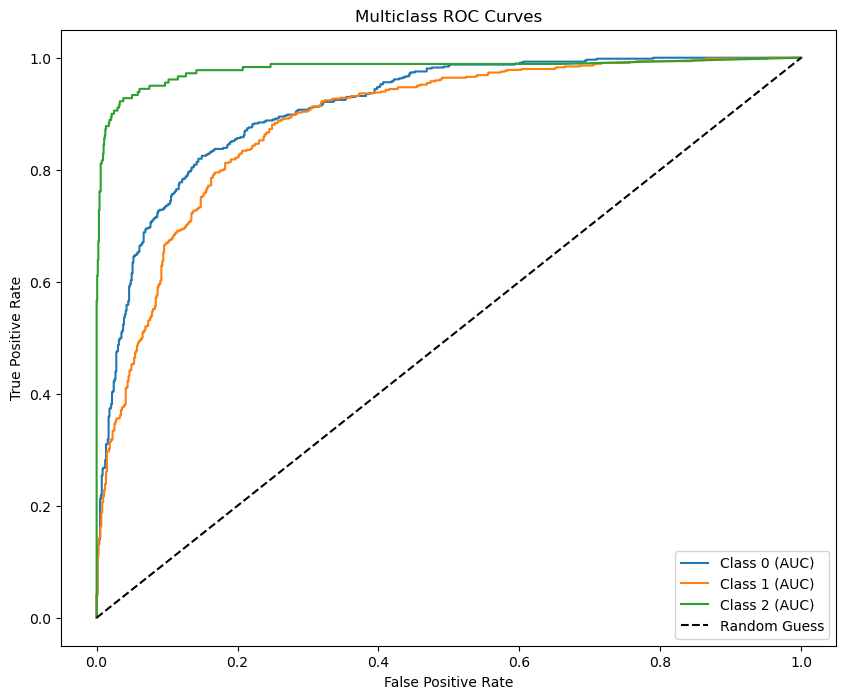

In [35]:
from sklearn.metrics import roc_curve

# Plot ROC curve for each class
classes = best_model.classes_
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_class == class_label, y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC)")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curves")
plt.legend()
plt.show()


In [ ]:
X_train_selected

## Linear regression ac

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create regression models for each bin
regression_models = {}
for bin_label in labels:
    bin_data = rental_data[rental_data['price_bin'] == bin_label]
    X_bin = bin_data.drop(['price', 'price_bin'], axis=1)
    y_bin = bin_data['price']
    
    # Split data for regression
    X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)
    
    # Train Linear Regression model (or another regressor)
    reg_model = LinearRegression()
    reg_model.fit(X_train_bin, y_train_bin)
    
    # Evaluate the regression model
    y_pred_bin = reg_model.predict(X_test_bin)
    mse = mean_squared_error(y_test_bin, y_pred_bin)
    rmse = mean_squared_error(y_test_bin, y_pred_bin, squared=False)
    print(f"MSE for {bin_label} bin: {mse}")
    print(f"RMSE for {bin_label} bin: {rmse}")
    
    # Store the model
    regression_models[bin_label] = reg_model


MSE for 0 bin: 94334.73083240258
RMSE for 0 bin: 307.1395950254584
MSE for 1 bin: 417566.19851047907
RMSE for 1 bin: 646.1936230809455
MSE for 2 bin: 99241465.46120954
RMSE for 2 bin: 9962.001077153602


## 2. Ridge Regression (L2 Regularization)

In [38]:
from sklearn.linear_model import Ridge
# Create regression models for each bin
regression_models = {}
for bin_label in labels:
    bin_data = rental_data[rental_data['price_bin'] == bin_label]
    X_bin = bin_data.drop(['price', 'price_bin'], axis=1)
    y_bin = bin_data['price']
    
    # Split data for regression
    X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)
    
    # Ridge Regression
    reg_model = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
    reg_model.fit(X_train_bin, y_train_bin)

    # Evaluate the model
    y_pred_bin = reg_model.predict(X_test_bin)
    mse = mean_squared_error(y_test_bin, y_pred_bin)
    rmse = mean_squared_error(y_test_bin, y_pred_bin, squared=False)
    print(f"MSE for Ridge Regression in {bin_label} bin: {mse}")
    print(f"RMSE for Ridge Regression in {bin_label} bin: {rmse}")


MSE for Ridge Regression in 0 bin: 94309.0829191756
RMSE for Ridge Regression in 0 bin: 307.09783932677806
MSE for Ridge Regression in 1 bin: 420927.9874543089
RMSE for Ridge Regression in 1 bin: 648.7896326655574
MSE for Ridge Regression in 2 bin: 97222460.99814709
RMSE for Ridge Regression in 2 bin: 9860.145079974589


/Users/nikhilsoni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.22676e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/nikhilsoni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.68618e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## 3. Lasso Regression (L1 Regularization)

In [39]:
from sklearn.linear_model import Lasso
# Create regression models for each bin
regression_models = {}
for bin_label in labels:
    bin_data = rental_data[rental_data['price_bin'] == bin_label]
    X_bin = bin_data.drop(['price', 'price_bin'], axis=1)
    y_bin = bin_data['price']
    
    # Split data for regression
    X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)
    
    # Lasso Regression
    reg_model = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
    reg_model.fit(X_train_bin, y_train_bin)

    # Evaluate the model
    y_pred_bin = reg_model.predict(X_test_bin)
    mse = mean_squared_error(y_test_bin, y_pred_bin)
    rmse = mean_squared_error(y_test_bin, y_pred_bin, squared=False)
#     print(f"MSE for Lasso Regression in {bin_label} bin: {mse}")
    print(f"RMSE for Lasso Regression in {bin_label} bin: {rmse}")


/Users/nikhilsoni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.058e+08, tolerance: 3.899e+04
  model = cd_fast.enet_coordinate_descent(
/Users/nikhilsoni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.888e+08, tolerance: 1.440e+05
  model = cd_fast.enet_coordinate_descent(
/Users/nikhilsoni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

RMSE for Lasso Regression in 0 bin: 306.169192205622
RMSE for Lasso Regression in 1 bin: 647.450739022097
RMSE for Lasso Regression in 2 bin: 9887.854983976185


## 4. Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
# Create regression models for each bin
regression_models = {}
for bin_label in labels:
    bin_data = rental_data[rental_data['price_bin'] == bin_label]
    X_bin = bin_data.drop(['price', 'price_bin'], axis=1)
    y_bin = bin_data['price']
    
    # Split data for regression
    X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)
    
    # Random Forest Regression
    reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
    reg_model.fit(X_train_bin, y_train_bin)

    # Evaluate the model
    y_pred_bin = reg_model.predict(X_test_bin)
    mse = mean_squared_error(y_test_bin, y_pred_bin)
    rmse = mean_squared_error(y_test_bin, y_pred_bin, squared=False)
#     print(f"MSE for Random Forest in {bin_label} bin: {mse}")
    print(f"RMSE for Random Forest in {bin_label} bin: {rmse}")


RMSE for Random Forest in 0 bin: 283.564983090673
RMSE for Random Forest in 1 bin: 558.0533767501266
RMSE for Random Forest in 2 bin: 9505.045723789117


## 5. Gradient Boosting Regressor

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
# Create regression models for each bin
regression_models = {}
for bin_label in labels:
    bin_data = rental_data[rental_data['price_bin'] == bin_label]
    X_bin = bin_data.drop(['price', 'price_bin'], axis=1)
    y_bin = bin_data['price']
    
    # Split data for regression
    X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)
    
    # Gradient Boosting Regression
    reg_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    reg_model.fit(X_train_bin, y_train_bin)

    # Evaluate the model
    y_pred_bin = reg_model.predict(X_test_bin)
    mse = mean_squared_error(y_test_bin, y_pred_bin)
    rmse = mean_squared_error(y_test_bin, y_pred_bin, squared=False)
#     print(f"MSE for Gradient Boosting in {bin_label} bin: {mse}")
    print(f"RMSE for Gradient Boosting in {bin_label} bin: {rmse}")
    regression_models[bin_label] = reg_model


RMSE for Gradient Boosting in 0 bin: 280.0729373860966
RMSE for Gradient Boosting in 1 bin: 533.4005217567834
RMSE for Gradient Boosting in 2 bin: 9316.92102562058


## 6. Support Vector Regressor (SVR)

In [42]:
from sklearn.svm import SVR
# Create regression models for each bin
regression_models = {}
for bin_label in labels:
    bin_data = rental_data[rental_data['price_bin'] == bin_label]
    X_bin = bin_data.drop(['price', 'price_bin'], axis=1)
    y_bin = bin_data['price']
    
    # Split data for regression
    X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)
    
    # Support Vector Regression
    reg_model = SVR(kernel='rbf', C=100, gamma=0.1)  # Tune C and gamma for better performance
    reg_model.fit(X_train_bin, y_train_bin)

    # Evaluate the model
    y_pred_bin = reg_model.predict(X_test_bin)
    mse = mean_squared_error(y_test_bin, y_pred_bin)
    rmse = mean_squared_error(y_test_bin, y_pred_bin, squared=False)
#     print(f"MSE for SVR in {bin_label} bin: {mse}")
    print(f"RMSE for SVR in {bin_label} bin: {rmse}")


RMSE for SVR in 0 bin: 430.45993035334783
RMSE for SVR in 1 bin: 806.7695593643886
RMSE for SVR in 2 bin: 15763.768255580178


## 7. XGBoost Regressor

In [43]:
from xgboost import XGBRegressor
# Create regression models for each bin
regression_models = {}
for bin_label in labels:
    bin_data = rental_data[rental_data['price_bin'] == bin_label]
    X_bin = bin_data.drop(['price', 'price_bin'], axis=1)
    y_bin = bin_data['price']
    
    # Split data for regression
    X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)
    X_train_bin.columns = X_train_bin.columns.astype(str)
    X_test_bin.columns = X_test_bin.columns.astype(str)
    X_train_bin.columns = X_train_bin.columns.str.replace('[\[\]<]', '', regex=True)
    X_test_bin.columns = X_test_bin.columns.str.replace('[\[\]<]', '', regex=True)

    # XGBoost Regression
    reg_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    reg_model.fit(X_train_bin, y_train_bin)

    # Evaluate the model
    y_pred_bin = reg_model.predict(X_test_bin)
    mse = mean_squared_error(y_test_bin, y_pred_bin)
    rmse = mean_squared_error(y_test_bin, y_pred_bin, squared=False)
#     print(f"MSE for XGBoost in {bin_label} bin: {mse}")
    print(f"RMSE for XGBoost in {bin_label} bin: {rmse}")


RMSE for XGBoost in 0 bin: 285.3893862410065
RMSE for XGBoost in 1 bin: 542.064347461951
RMSE for XGBoost in 2 bin: 9907.50854489103


In [45]:
regression_models

{0: GradientBoostingRegressor(random_state=42),
 1: GradientBoostingRegressor(random_state=42),
 2: GradientBoostingRegressor(random_state=42)}

In [46]:
def predict_price(data_point, classifier, regressors, bins):
    # Step 1: Predict the bin
    predicted_bin = classifier.predict([data_point])[0]
    
    # Step 2: Use the corresponding regression model
    regressor = regressors[predicted_bin]
    predicted_price = regressor.predict([data_point])[0]
    
    return predicted_bin, predicted_price

In [48]:
data_point = X_test_class.iloc[0]
data_point

daysOnMarket                                            0.000000
zip                                                 11237.000000
beds                                                    1.000000
baths                                                   1.000000
latitude                                               40.703520
longitude                                             -73.916113
hasVideo                                                1.000000
PhotosNum                                              18.000000
Number of Households                                17513.000000
Median Household Income                             79136.000000
Per Capita Income                                   35966.000000
Total Income Distribution                           17513.000000
Median Gross Rent                                    1998.000000
Median Home Value                                  949700.000000
Occupied Housing Units                              17513.000000
Vacant Housing Units     

In [49]:
# Example usage
clf = best_model
data_point = X_test_class.iloc[0]  # Example data point
predicted_bin, predicted_price = predict_price(data_point, clf, regression_models, labels)
print(f"Predicted Bin: {predicted_bin}, Predicted Price: {predicted_price}")

/Users/nikhilsoni/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 60 features, but RandomForestClassifier is expecting 30 features as input.

,daysOnMarket,zip,beds,baths,latitude,longitude,hasVideo,PhotosNum,Number of Households,Median Household Income,...,month_available,day_available,beds_baths_interaction,log_monthly_housing_costs,precinct_safety_rank_scaled,median_income_scaled,crime_to_safety_ratio,beds_to_baths_ratio,diversity_index,occupied_to_vacant_ratio
5040,12.0,10024,3,4.0,40.791645,-73.977040,0,0,29472.0,166994.0,...,2,15,12.0,7.939515,-0.750240,1.678370,0.047402,0.600000,0.000155,4.300598
2147,80.0,10019,2,2.0,40.763524,-73.974557,1,12,26297.0,113335.0,...,9,6,4.0,7.757906,1.003526,0.396493,0.027879,0.666667,0.001226,3.925511
3193,11.0,11233,3,4.0,40.679100,-73.912730,0,0,32516.0,57812.0,...,10,15,12.0,7.400010,1.539399,-0.929913,0.029947,0.600000,0.000207,18.784518
5171,12.0,10010,3,2.0,40.741165,-73.982210,0,0,16050.0,150288.0,...,8,15,6.0,7.937375,0.808663,1.279275,0.027717,1.000000,0.000873,5.502228
299,16.0,10012,2,1.0,40.728298,-73.994904,1,7,11529.0,126890.0,...,1,15,2.0,7.904335,-0.409230,0.720313,0.038327,1.000000,0.000356,4.203062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,41.0,10019,3,4.0,40.761375,-73.977493,1,10,26297.0,113335.0,...,10,16,12.0,7.757906,1.003526,0.396493,0.027879,0.600000,0.001226,3.925511
6144,12.0,10011,3,4.0,40.741520,-73.998405,0,0,28874.0,145934.0,...,3,15,12.0,7.903966,-1.188682,1.175261,0.070279,0.600000,0.000420,4.699544
191,4.0,10016,2,2.0,40.747400,-73.971400,1,12,30162.0,145864.0,...,11,22,4.0,8.000349,-1.432260,1.173589,0.099035,0.666667,0.000738,4.798282
425,1.0,11201,2,2.0,40.701875,-73.983742,1,20,32227.0,163310.0,...,11,25,4.0,8.015658,-0.604093,1.590362,0.043168,0.666667,0.001154,11.131952
